In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Easy
Скачать данные отсюда (кнопка download all снизу):

https://www.kaggle.com/c/titanic/data

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [141]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [142]:
# процент детей (младше 18 лет)

under_18 = len(df[df['Age'] < 18]) / len(df)
print(f'{under_18 * 100:.2f} %')

12.68 %


In [143]:
# соотношение мужчин/женщин на борту

men_women = len(df[df['Sex'] == 'male']) / len(df[df['Sex'] == 'female'])
print(f'{men_women:.2f}')

1.84


# Normal
Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [144]:
# Посчитать по скольким людям нет информации (пола или возраста)
# по полу почему-то у всех информация есть

df.isna().sum()['Age']

177

<AxesSubplot:xlabel='Age', ylabel='Количество'>

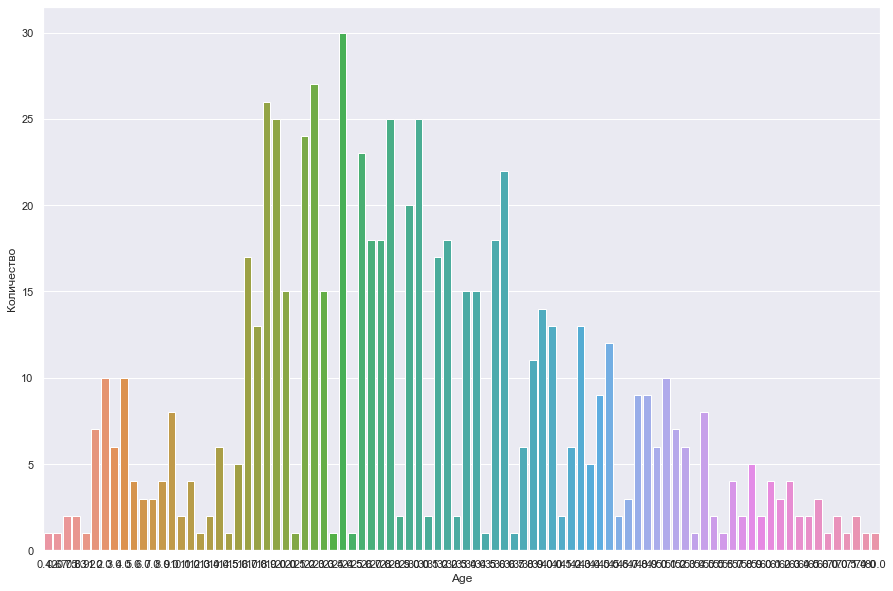

In [145]:
# Вывести гистограмму по возрасту пассажиров
# не знаю как сделать читабельным значения оси x, как делать подсчет без ввода колонки 'Количество'

sns.set(rc={'figure.figsize':(15,10)})
df_barplot = df.copy(deep = True)
df_barplot['Количество'] = 1
df_barplot = df_barplot.groupby('Age').count().reset_index()

sns.barplot(data = df_barplot, x="Age", y="Количество")

In [146]:
# Посчитать какой процент мужин и женщин выжили

df_mw_surv = df[df['Age'] >= 18].groupby(['Sex', 'Survived']).count().reset_index()
(df_mw_surv['PassengerId'] * df_mw_surv['Survived']).sum() / df_mw_surv['PassengerId'].sum()

0.3810316139767055

In [147]:
# Посчитать какой процент детей выжил

df_ch_surv = df[df['Age'] < 18].groupby(['Survived']).count().reset_index()
(df_ch_surv['PassengerId'] * df_ch_surv['Survived']).sum() / df_ch_surv['PassengerId'].sum()

0.5398230088495575

In [148]:
# Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

df = pd.read_csv('train.csv')

df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df_corr = df.corr(method='pearson', min_periods=1)

print(df_corr.loc['Age', 'Survived'])
print(df_corr.loc['Sex', 'Survived'])

-0.07722109457217756
-0.543351380657755


# Hard
Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

Загрузить решение на kaggle.

Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.

In [415]:
# написать простейшую модель, которая будет определять по входным данным, выжил ли человек

def is_survived(df, Pclass = None, Sex = None, Age = None, SibSp = None, \
                Parch = None, Fare = None, Cabin = None, Embarked = None):
    df = df.fillna(False)
    
    characteristics = {'Pclass': Pclass, 'Sex': Sex, 'Age': Age, 'SibSp': SibSp, \
                       'Parch': Parch, 'Fare': Fare, 'Cabin': Cabin, 'Embarked': Embarked}
    for char in characteristics:
        if characteristics[char] == None or characteristics[char] == False:
            pass
        else:
            df = df[df[char] == characteristics[char]]
            
    if len(df) == 0 or len(df[df['Survived'] == 0]) == len(df[df['Survived'] == 1]):     
        return random.randint(0, 1)
    
    return 0 if len(df[df['Survived'] == 0]) > len(df[df['Survived'] == 1]) else 1
    

In [416]:
# Проверить свою гипотезу на данных train.csv, оценить успешность модели
# примерно 2/3 угадывает. не очень хорошо

df = pd.read_csv('train.csv')
correct, incorrect = 0, 0
for i in range(len(df)):
    
    if df.iloc[i, 1] == is_survived(df, Pclass = df.loc[i, "Pclass"], Sex = df.loc[i, "Sex"], Age = df.loc[i, "Age"], \
                                 SibSp = df.loc[i, "SibSp"], Parch = df.loc[i, "Parch"], Fare = df.loc[i, "Fare"], \
                                 Cabin = df.loc[i, "Cabin"], Embarked = df.loc[i, "Embarked"]):
        correct += 1
    else:
        incorrect += 1

print(correct, incorrect)

527 364


In [419]:
# Прогнать модель на файле test.csv

df = pd.read_csv('train.csv')
new_df = pd.read_csv('test.csv')

passengers = []
for i in range(len(new_df)): 
    passengers.append([new_df.loc[i, 'PassengerId'], is_survived(df, Pclass = new_df.loc[i, "Pclass"], Sex = new_df.loc[i, "Sex"], Age = new_df.loc[i, "Age"], \
                                                     SibSp = new_df.loc[i, "SibSp"], Parch = new_df.loc[i, "Parch"], Fare = new_df.loc[i, "Fare"], \
                                                     Cabin = new_df.loc[i, "Cabin"], Embarked = new_df.loc[i, "Embarked"])])
                       
answer = pd.DataFrame(passengers, columns = ['PassengerId', 'Survived'])

In [420]:
answer

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
